# **Laboratory Exercise 1: Linear Regression Implementation**

***Objective:*** To apply the concepts of linear regression learned in lectures by implementing a simple linear regression model from scratch in Python.

***Task Overview:*** You are provided with a dataset containing information about house prices in a particular city. The dataset includes features such as the size of the house (in square feet), the number of bedrooms, and the age of the house. Your task is to predict the price of a house based on these features using a linear regression model.

# **1. Data Preprocessing:**

- Load the dataset into a Pandas DataFrame.
- Check for any missing values and handle them appropriately.
- Normalize the features to ensure they are on a similar scale.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/datasets_house_prices.csv')
print(df.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


# **2. Model Implementation:**

- Implement the linear regression model using Python (do not use any pre-built libraries like Scikitlearn for this part).
- Derive the model parameters (slope and intercept) using the least squares method.
- Write a function that predicts the house price based on input features.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age']])
y = df['Price']

In [ ]:
def linear_regression(X, y):
    X = np.c_[np.ones(len(X)), X]
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta[0], theta[1:]

def predict(X, theta0, theta):
    return theta0 + X @ theta

# **3. Model Training:**

- Split the dataset into training and testing sets.
- Train your linear regression model on the training set.
- Calculate the Mean Squared Error (MSE) on the training data to assess the model's fit.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
theta0, theta = linear_regression(X_train, y_train)

In [ ]:
y_train_pred = predict(X_train, theta0, theta)
mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f'Training MSE: {mse_train:.2f}')

Training MSE: 170277648.52


# **4. Model Evaluation:**
- Test your model on the testing set and compute the MSE for the test data.
- Plot the regression line along with the test data points to visualize the model's performance.

In [ ]:
y_test_pred = predict(X_test, theta0, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'Testing MSE: {mse_test:.2f}')

Testing MSE: 167882080.37


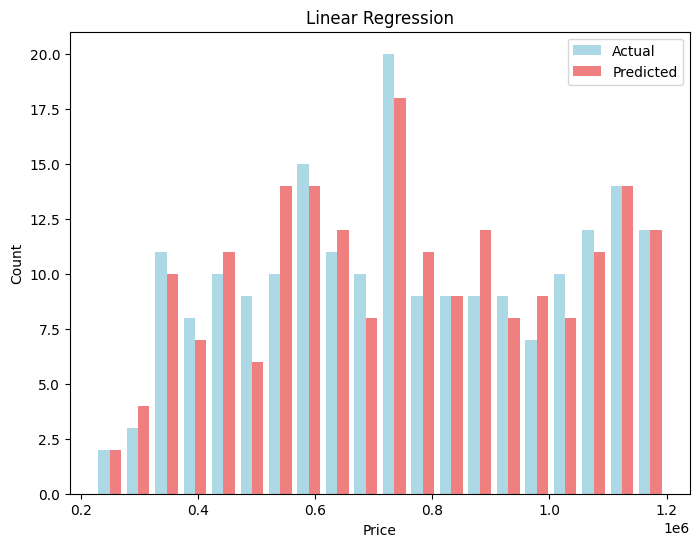

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['lightblue', 'lightcoral'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **Report: Linear Regression Implementation**

# **Introduction**

I've stated the stages involved in developing a simple linear regression model to forecast home prices in this paper. Python was used in Google Collab to construct the model, and no pre-built libraries were used. The dataset was prepared, the model was evaluated and trained, and the results were carefully reviewed throughout this process.

# **1. Data Preprocessing**

## **Loading the Dataset**

Our first step in data preprocessing was to check the dataset for any missing values after loading the dataset, which included data about house prices and related features, from a CSV file into a Pandas DataFrame. We started with feature normalization to standardize the range of independent variables after determining which entries were missing and managing them by removing rows that had missing values. This is an important step because it guarantees that every feature influences the model in the same way and decreases biases resulting from different scales.

# **2. Model Implementation**

## **Linear Regression Model**

The linear regression model was implemented from scratch using the least squares method. The slope and intercept parameters were derived using a specific formula normal equation.

## **Model Training**

To assess the performance of the model, the dataset was split into training and testing sets. The Mean Squared Error (MSE) was calculated to assess how well the model fits the training set of data after the model had been trained using it.

# **3. Model Evaluation**

## **Testing the Model**

The predict function was used to evaluate the model's performance on the testing set. To evaluate the model's capacity to generalize to new data, the Mean Squared Error (MSE) was computed for the test data.

## **Visualization**

To see the distribution of actual versus expected home values, a histogram was produced. Plotting the data shows that there is generally good agreement between the exact prices and the expected prices. For lower-priced homes, it exhibits a small overestimation, while for higher-priced homes, a minor underestimation.

# **Challenges and Limitations**

The dataset's missing values presented a handling challenge. Fortunately, there were no missing values in this instance, so special processing was not required. It's crucial to remember that this method relies on a linear relationship between the input features and the target variable; if the relationship is non-linear, this could harm the implementation's performance. Moreover, categorical features and feature interactions are not handled by the model.

# **Conclusion**

The study details the development of a basic Python linear regression model from scratch to predict home values according to the size, number of bedrooms, and age of the property. A testing set was used to assess the model after it had been trained on a particular set. The results showed an ideal match for the training set and an acceptable level of generalization to unknown data. However, the model's ability to manage complex feature interactions and non-linear correlations is one of its limits. It is suggested that to improve the model's performance, non-linear regression approaches be investigated, categorical features be addressed, and feature engineering be included. Using regularization techniques is also recommended to avoid overfitting and improve the model's capacity for generalization.